In [2]:
#!pip install tensorflow
#!pip install matplotlib
#!pip install scikit-learn
#!pip install tqdm


## JUST FOR CUDA USERS:
#from tensorflow.keras import backend as K
import tensorflow as tf
#K.clear_session()
#tf.compat.v1.reset_default_graph()
tf.config.set_visible_devices([], 'GPU')

2025-04-27 22:17:01.558793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745813821.575764   59104 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745813821.580787   59104 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745813821.594426   59104 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745813821.594446   59104 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745813821.594447   59104 computation_placer.cc:177] computation placer alr

## APRENDIZAJE FEDERADO.

El aprendizaje federado consiste en entrenar un modelo localmente con un subconjunto de datos, para después computar un modelo global (idéntico) que será desplegado como un servicio.

Para simular una situación de aprendizaje federado, usaremos la bien-conocida base de datos MNIST para interpretar número escritos a mano, y la dividiremos en cinco partes (en su caso, será en cuantos miembros de su equipo tengan).

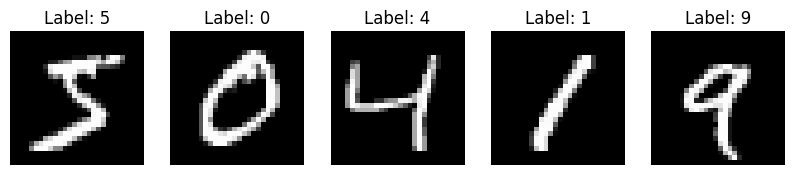

12000
Frecuencia de números: {0: 1184, 1: 1348, 2: 1191, 3: 1227, 4: 1169, 5: 1085, 6: 1183, 7: 1253, 8: 1170, 9: 1190}
Primeros ejemplos (labels): [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1]
12000
Frecuencia de números: {0: 1185, 1: 1349, 2: 1191, 3: 1226, 4: 1168, 5: 1084, 6: 1184, 7: 1253, 8: 1170, 9: 1190}
Primeros ejemplos (labels): [7, 7, 7, 7, 7, 7, 6, 7, 7, 6, 6, 7, 0, 7, 6]
12000
Frecuencia de números: {0: 1185, 1: 1349, 2: 1192, 3: 1226, 4: 1168, 5: 1084, 6: 1184, 7: 1253, 8: 1170, 9: 1189}
Primeros ejemplos (labels): [3, 3, 3, 3, 9, 3, 9, 9, 3, 3, 3, 9, 9, 1, 9]
12000
Frecuencia de números: {0: 1185, 1: 1348, 2: 1192, 3: 1226, 4: 1168, 5: 1084, 6: 1184, 7: 1253, 8: 1170, 9: 1190}
Primeros ejemplos (labels): [1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 9, 9, 9, 1, 9]
12000
Frecuencia de números: {0: 1184, 1: 1348, 2: 1192, 3: 1226, 4: 1169, 5: 1084, 6: 1183, 7: 1253, 8: 1171, 9: 1190}
Primeros ejemplos (labels): [1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 9, 1, 1, 1]


In [3]:
import tensorflow as tf
import numpy as np

train, test = tf.keras.datasets.mnist.load_data()

x_train, x_test = np.expand_dims(train[0] / 255.0, -1), np.expand_dims(test[0] / 255.0, -1)
y_train, y_test = train[1], test[1]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


## Data split para simular cinco datos aparte.
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

folds = skf.split(x_train, y_train)

local_data = [(x_train[tsix], y_train[tsix]) for trix, tsix in folds]

for x in local_data:
    print(len(x[0]))
    print(f"Frecuencia de números: { {int(y):list(x[1]).count(y) for y in set(x[1])} }")
    print(f"Primeros ejemplos (labels): {[int(y) for y in list(x[1])[:15]]}")

FOLD 0:   0%|          | 0/5 [00:00<?, ?it/s]

<Sequential name=sequential_1, built=True>
Epoch 1/5


I0000 00:00:1745813839.084887   59339 service.cc:152] XLA service 0x7323ec00c370 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745813839.084911   59339 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-04-27 22:17:19.105714: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


  3/375 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.1337 - loss: 2.2798

I0000 00:00:1745813839.414204   59339 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.7548 - loss: 0.7700 - val_accuracy: 0.9684 - val_loss: 0.1073
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9682 - loss: 0.1008 - val_accuracy: 0.9707 - val_loss: 0.0910
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9812 - loss: 0.0638 - val_accuracy: 0.9786 - val_loss: 0.0682
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9836 - loss: 0.0492 - val_accuracy: 0.9787 - val_loss: 0.0662
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9880 - loss: 0.0356 - val_accuracy: 0.9819 - val_loss: 0.0526
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982

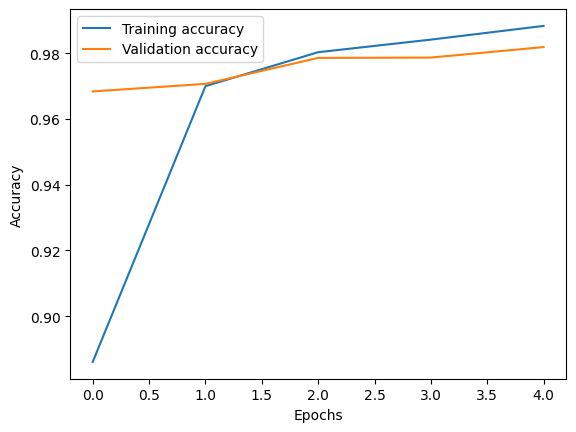

FOLD 0:  20%|██        | 1/5 [01:34<06:17, 94.40s/it]

<Sequential name=sequential_2, built=True>
Epoch 1/5


/home/jesus/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7566 - loss: 0.7826 - val_accuracy: 0.9683 - val_loss: 0.1071
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.9696 - loss: 0.0951 - val_accuracy: 0.9782 - val_loss: 0.0705
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9784 - loss: 0.0666 - val_accuracy: 0.9797 - val_loss: 0.0649
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.9787 - val_loss: 0.0651
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.9901 - loss: 0.0311 - val_accuracy: 0.9823 - val_loss: 0.0564
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982

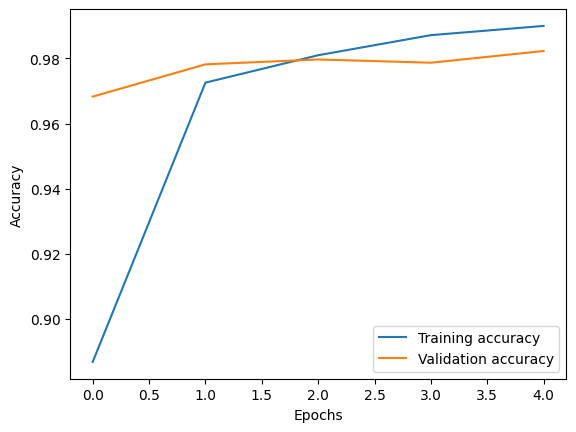

FOLD 0:  40%|████      | 2/5 [03:14<04:52, 97.62s/it]

<Sequential name=sequential_3, built=True>
Epoch 1/5


/home/jesus/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.7391 - loss: 0.8083 - val_accuracy: 0.9582 - val_loss: 0.1373
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9657 - loss: 0.1099 - val_accuracy: 0.9706 - val_loss: 0.0952
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9773 - loss: 0.0704 - val_accuracy: 0.9700 - val_loss: 0.0963
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9834 - loss: 0.0518 - val_accuracy: 0.9794 - val_loss: 0.0685
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9876 - loss: 0.0351 - val_accuracy: 0.9728 - val_loss: 0.0861
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.90      0.99      0.95      1010
           4       0.97      0.99      0.98       982

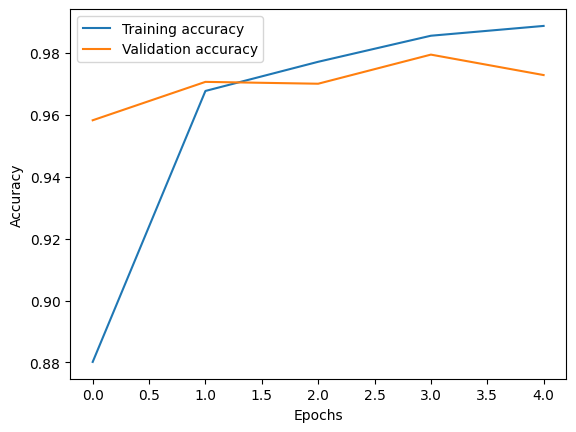

FOLD 0:  60%|██████    | 3/5 [05:02<03:24, 102.33s/it]

<Sequential name=sequential_4, built=True>
Epoch 1/5


/home/jesus/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7617 - loss: 0.7573 - val_accuracy: 0.9619 - val_loss: 0.1232
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9633 - loss: 0.1189 - val_accuracy: 0.9726 - val_loss: 0.0853
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9748 - loss: 0.0725 - val_accuracy: 0.9742 - val_loss: 0.0789
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9819 - loss: 0.0516 - val_accuracy: 0.9731 - val_loss: 0.0797
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9861 - loss: 0.0436 - val_accuracy: 0.9781 - val_loss: 0.0649
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.98       982

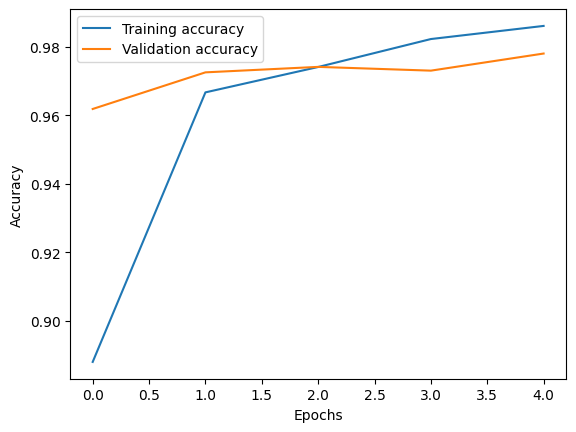

FOLD 0:  80%|████████  | 4/5 [06:35<01:38, 98.88s/it] 

<Sequential name=sequential_5, built=True>
Epoch 1/5


/home/jesus/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.7828 - loss: 0.7075 - val_accuracy: 0.9574 - val_loss: 0.1380
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9737 - loss: 0.0872 - val_accuracy: 0.9648 - val_loss: 0.1108
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9813 - loss: 0.0659 - val_accuracy: 0.9809 - val_loss: 0.0602
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9885 - loss: 0.0412 - val_accuracy: 0.9772 - val_loss: 0.0711
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.9887 - loss: 0.0374 - val_accuracy: 0.9800 - val_loss: 0.0618
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.96      0.98       982

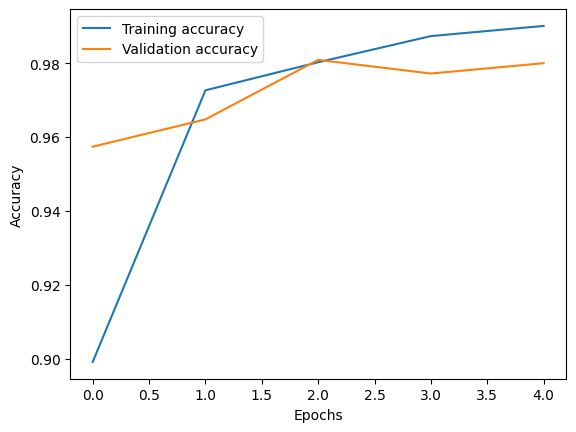

FOLD 0: 100%|██████████| 5/5 [08:16<00:00, 99.27s/it]


In [5]:
from sklearn.metrics import classification_report
def train_and_verify(local_model, local_data, epochs, x_test, y_test, save_name):

    print(local_model)

    history = local_model.fit(local_data[0], local_data[1], epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    local_model.save(save_name)

# Entrenamientos locales. Cada uno de estos deben hacerse en computadoras aparte.
from TheModel import build
from tqdm import tqdm
for x in tqdm(range(len(local_data)), desc=f"FOLD {x}"):
    local_model = build.build_it()
    train_and_verify(local_model, local_data[x], 5, x_test, y_test, f"lmodel_{x}.keras")

In [16]:
## Abrir los modelos:

import os
loaded_local_models = [tf.keras.models.load_model(os.path.join(root, file)) for root, dirs, files in os.walk("./") for file in files if file.endswith('.keras')]

for i in range(len(loaded_local_models)-1):
    assert loaded_local_models[i].summary() == loaded_local_models[i+1].summary(), "Models have different architectures"

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

In [18]:
local_weights = [x.get_weights() for x in loaded_local_models]
averaged_weights = [np.mean(np.array(weights), axis=0) for weights in zip(*local_weights)]

global_model = build.build_it()
global_model.set_weights(averaged_weights)

from sklearn.metrics import classification_report
# Predict the classes for the test set
y_pred = global_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

global_model.save('global_model.keras')

/home/jesus/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.27      0.00      0.01       980
           1       0.99      0.29      0.45      1135
           2       0.79      0.42      0.54      1032
           3       0.83      0.02      0.04      1010
           4       0.90      0.27      0.42       982
           5       0.15      1.00      0.26       892
           6       0.98      0.58      0.73       958
           7       0.46      0.88      0.61      1028
           8       0.79      0.11      0.19       974
           9       0.61      0.09      0.16      1009

    accuracy                           0.36     10000
   macro avg       0.68      0.37      0.34     10000
weighted avg       0.69      0.36      0.34     10000



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9015 - loss: 0.3142 - val_accuracy: 0.9850 - val_loss: 0.0490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9843 - loss: 0.0505 - val_accuracy: 0.9841 - val_loss: 0.0501
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9902 - val_loss: 0.0328
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9927 - loss: 0.0230 - val_accuracy: 0.9884 - val_loss: 0.0324
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9911 - val_loss: 0.0295
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99

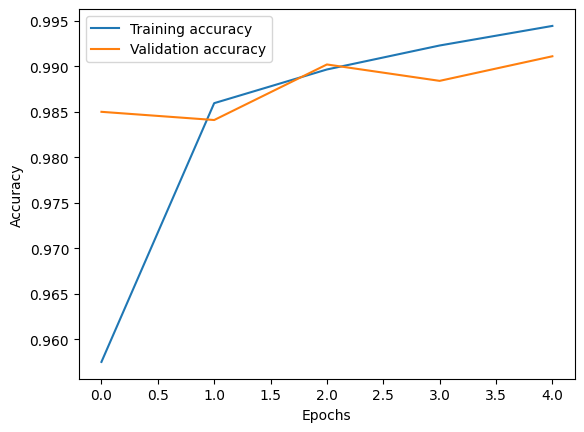

In [20]:
## VS A NORMAL GLOBLA MODEL TRAINED IN A SINGLE DEVICE:

model = build.build_it()

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

from sklearn.metrics import classification_report
# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

# Optionally, plot training history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()